In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random as r

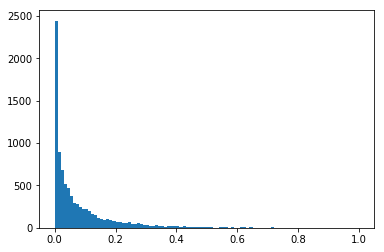

In [2]:
engagement = np.loadtxt('data/engagement.csv')
plt.hist(engagement, bins=100)
plt.show()

In [3]:
mean = np.mean(engagement)
std = np.std(engagement)

print("""
Population mean: %.5f
Population std: %.5f
Population size: %i
"""%(mean, std, len(engagement)))


Population mean: 0.07727
Population std: 0.10721
Population size: 8702



#### Sampling distribution

In [4]:
sample_size = 1000
n_trials = 1000
samples = [[r.choice(engagement) for _ in range(sample_size)] for _ in range(n_trials)]

In [5]:
means = [np.mean(sample) for sample in samples]

# mean of sampling distribution
sample_mean = np.mean(means)

# empirical standard error
sample_std = np.std(means)

analytical_std = std / np.sqrt(sample_size)

print("""
sampling distribution mean: %.5f
sampling distribution std: %.5f
analytical std: %.5f
"""%(sample_mean, sample_std, analytical_std))


sampling distribution mean: 0.07705
sampling distribution std: 0.00330
analytical std: 0.00339



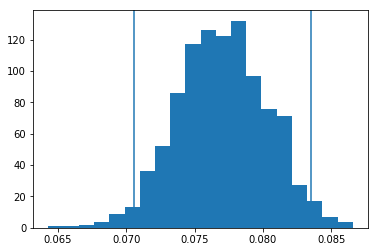

In [6]:
# sampling distribution
z = 1.96
plt.hist(means, bins=20)
plt.axvline(sample_mean - 1.96 * sample_std)
plt.axvline(sample_mean + 1.96 * sample_std)
plt.show()

#### Confidence Interval
* in this example, null hypothesis is true.
* we get 0.05 false positive rate, under the 95% confidence interval

In [7]:
# make 95% confidence interval
z = 1.96

In [8]:
success = 0
for sample in samples:
    x = np.mean(sample)
    s = np.std(sample)
    up = x + z * s / np.sqrt(sample_size)
    lo = x - z * s / np.sqrt(sample_size)
    
    if lo <= mean and mean <= up:
        success += 1
print("False positive rate: %.3f"%(1 - success / len(samples)))

False positive rate: 0.042
